In [28]:
import pandas as pd
import numpy as np
from google.colab import files
import io

# Upload the CSV files
print("Please upload the 4 processed CSV files:")
print("- va.csv")
print("- switzerland.csv")
print("- cleveland.csv")
print("- hungarian.csv")

uploaded = files.upload()

def combine_heart_datasets():
    """
    Simple function to combine 4 processed heart datasets.
    Just loads and concatenates - assumes files are already uploaded.
    """

    # Load datasets
    va = pd.read_csv('va.csv')
    switzerland = pd.read_csv('switzerland.csv')
    cleveland = pd.read_csv('cleveland.csv')
    hungarian = pd.read_csv('hungarian.csv')

    print(f"Dataset shapes:")
    print(f"VA: {va.shape}")
    print(f"Switzerland: {switzerland.shape}")
    print(f"Cleveland: {cleveland.shape}")
    print(f"Hungarian: {hungarian.shape}")

    # Combine all datasets
    combined = pd.concat([va, switzerland, cleveland, hungarian], ignore_index=True)
    print(f"\nCombined shape: {combined.shape}")

    return combined


# Step 3: Execute the combination
print("COMBINING DATASETS")
df = combine_heart_datasets()




Please upload the 4 processed CSV files:
- va.csv
- switzerland.csv
- cleveland.csv
- hungarian.csv


Saving cleveland.csv to cleveland (1).csv
Saving hungarian.csv to hungarian (1).csv
Saving switzerland.csv to switzerland (1).csv
Saving va.csv to va (1).csv
COMBINING DATASETS
Dataset shapes:
VA: (199, 12)
Switzerland: (123, 12)
Cleveland: (303, 12)
Hungarian: (293, 12)

Combined shape: (918, 12)


In [5]:
print(f"Final dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")


Final dataset shape: (918, 12)
Columns: ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']


In [6]:
print(df.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   63   M           ASY        140          260          0         ST    112   
1   44   M           ASY        130          209          0         ST    127   
2   60   M           ASY        132          218          0         ST    140   
3   55   M           ASY        142          228          0         ST    149   
4   66   M           NAP        110          213          1        LVH     99   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              Y      3.0     Flat             1  
1              N      0.0     Flat             0  
2              Y      1.5     Down             1  
3              Y      2.5       Up             1  
4              Y      1.3     Flat             0  


In [7]:
print(df.dtypes)

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


In [8]:
df['FastingBS'] = df['FastingBS'].astype('object')
df['HeartDisease'] = df['HeartDisease'].astype('object')
print(df.dtypes)

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS          object
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease       object
dtype: object


In [9]:
print(df.describe())

              Age   RestingBP  Cholesterol       MaxHR     Oldpeak
count  918.000000  918.000000   918.000000  918.000000  918.000000
mean    53.510893  131.989107   192.818083  136.514161    0.821351
std      9.432617   18.450201   114.504835   25.483104    1.077074
min     28.000000    0.000000     0.000000   60.000000   -2.600000
25%     47.000000  120.000000   164.250000  120.000000    0.000000
50%     54.000000  130.000000   221.000000  138.000000    0.200000
75%     60.000000  140.000000   267.000000  155.750000    1.500000
max     77.000000  200.000000   603.000000  202.000000    6.200000


In [10]:
print(f"\nUnique values in categorical columns:")
print(f"Sex: {df['Sex'].unique()}")
print(f"ChestPainType: {df['ChestPainType'].unique()}")
print(f"RestingECG: {df['RestingECG'].unique()}")
print(f"FastingBS: {df['FastingBS'].unique()}")
print(f"ExerciseAngina: {df['ExerciseAngina'].unique()}")
print(f"ST_Slope: {df['ST_Slope'].unique()}")
print(f"HeartDisease: {df['HeartDisease'].unique()}")


Unique values in categorical columns:
Sex: ['M' 'F']
ChestPainType: ['ASY' 'NAP' 'ATA' 'TA']
RestingECG: ['ST' 'LVH' 'Normal']
FastingBS: [0 1]
ExerciseAngina: ['Y' 'N']
ST_Slope: ['Flat' 'Down' 'Up']
HeartDisease: [1 0]


In [11]:
print(df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [12]:
print(df.duplicated().sum())

0


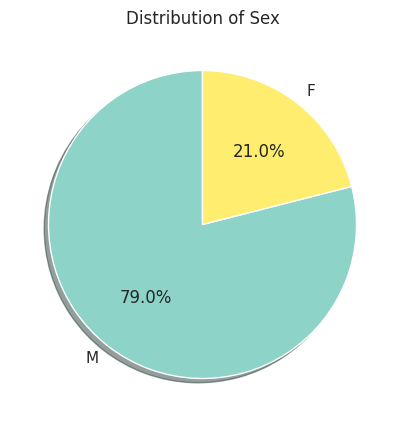

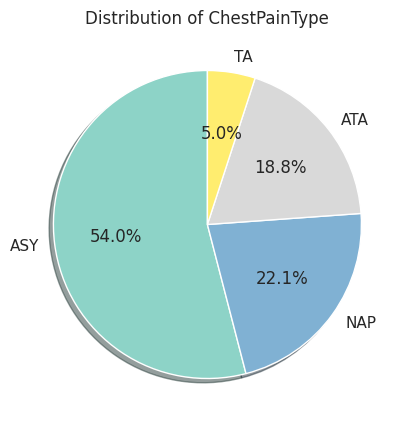

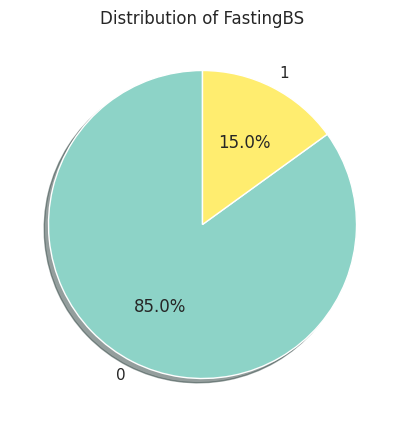

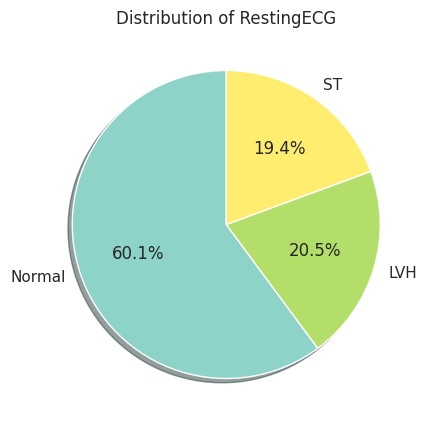

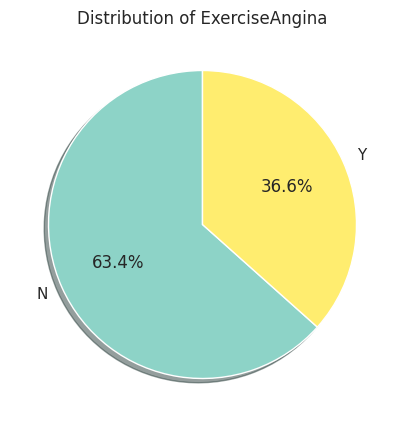

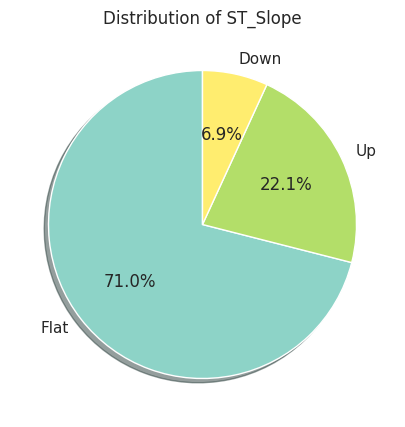

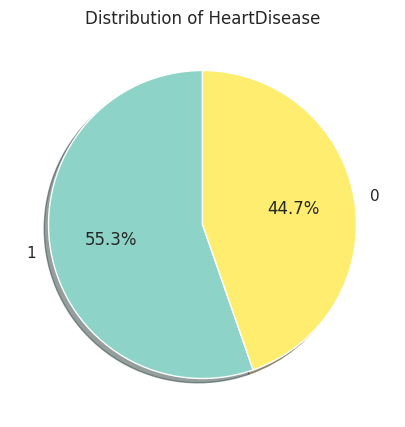

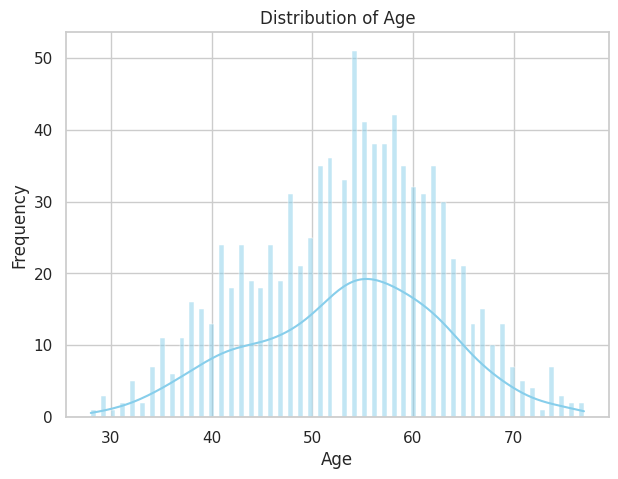

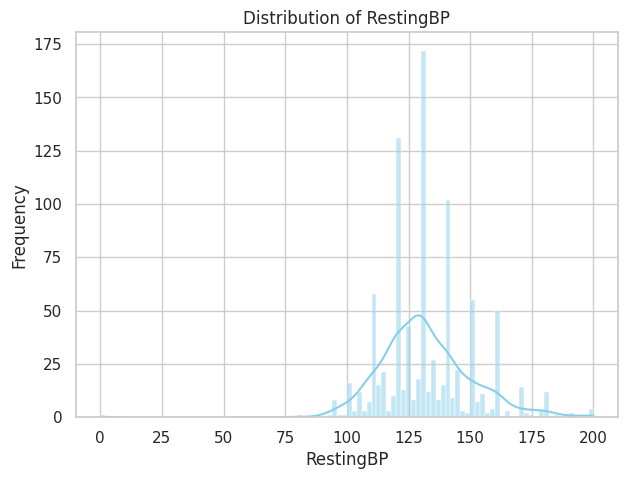

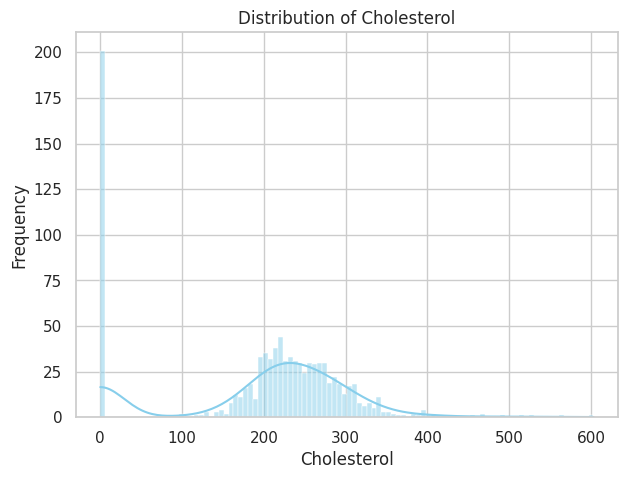

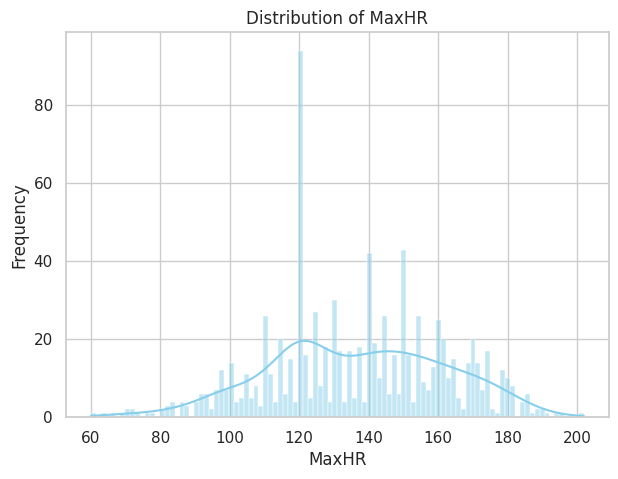

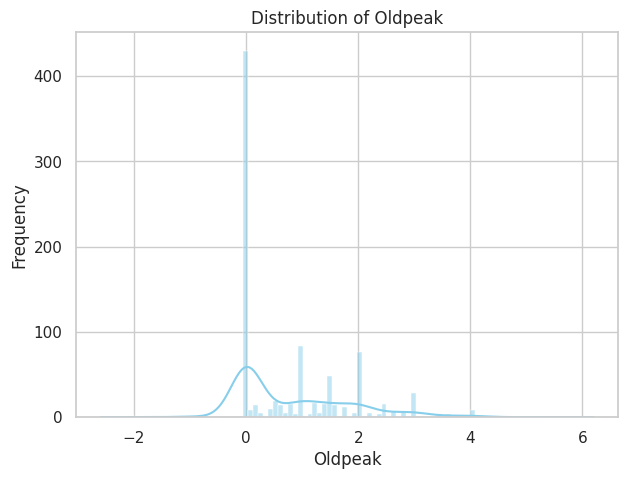

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify feature types
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (7, 5)

# ---- PIE CHARTS for CATEGORICAL FEATURES ----
for col in categorical_cols:
    plt.figure()
    df[col].value_counts().plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        shadow=True,
        cmap='Set3'
    )
    plt.title(f"Distribution of {col}")
    plt.ylabel('')  # remove default ylabel
    plt.show()

# ---- HISTOGRAMS for NUMERIC FEATURES ----
for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col].dropna(), kde=True, bins=100, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


In [14]:
cholesterol_median = df.loc[df['Cholesterol'] != 0, 'Cholesterol'].median()

# Replace 0s with that median
df['Cholesterol'] = df['Cholesterol'].replace(0, cholesterol_median)

RestingBP_median = df.loc[df['RestingBP'] != 0, 'RestingBP'].median()

# Replace 0s with that median
df['RestingBP'] = df['RestingBP'].replace(0, cholesterol_median)

In [15]:
skew_kurt = pd.DataFrame({
    'Skewness': df[numeric_cols].skew(),
    'Kurtosis': df[numeric_cols].kurt()
})

print("📈 Skewness and Kurtosis of Numeric Features:\n")
print(skew_kurt)

📈 Skewness and Kurtosis of Numeric Features:

             Skewness  Kurtosis
Age         -0.195933 -0.386140
RestingBP    0.845889  1.923881
Cholesterol  1.564805  7.048579
MaxHR       -0.107142 -0.471259
Oldpeak      1.136868  1.318007


In [16]:
# RestingBP: sqrt transformation
df['RestingBP_sqrt'] = np.sqrt(df['RestingBP'])

# Cholesterol: log transformation
df['Cholesterol_log'] = np.log(df['Cholesterol'])

# Oldpeak: log(x+1) transformation to handle 0s
min_val = df['Oldpeak'].min()
df['Oldpeak_shifted'] = df['Oldpeak'] - min_val + 1

df['Oldpeak_log'] = np.log1p(df['Oldpeak_shifted'])

df = df.drop(columns= ['RestingBP', 'Cholesterol', 'Oldpeak', 'Oldpeak_shifted'])


📈 Skewness and Kurtosis of Numeric Features:

                 Skewness  Kurtosis
Age             -0.195933 -0.386140
MaxHR           -0.107142 -0.471259
RestingBP_sqrt   0.558413  1.111196
Cholesterol_log -0.002186  3.056263
Oldpeak_log      0.566759  0.780840


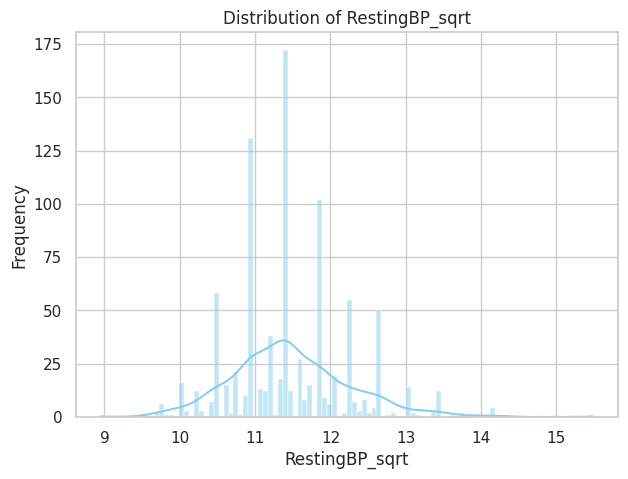

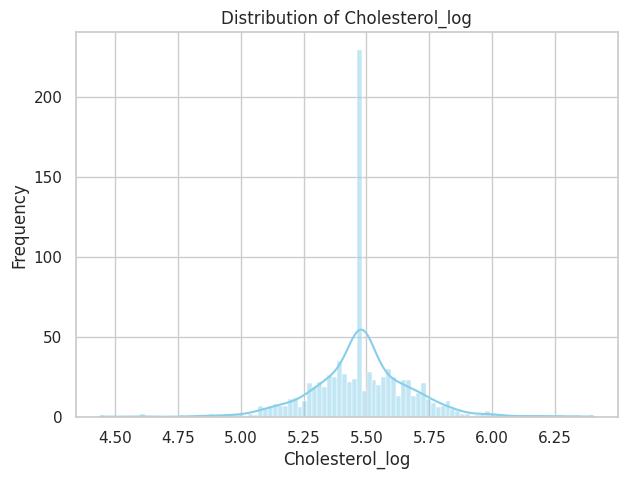

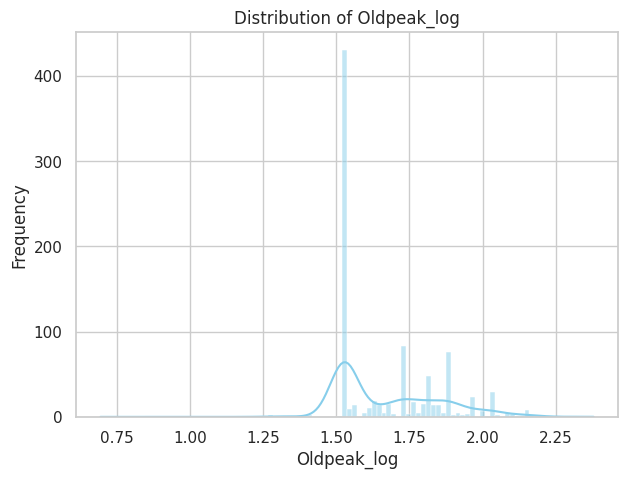

In [17]:

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
skew_kurt = pd.DataFrame({
    'Skewness': df[numeric_cols].skew(),
    'Kurtosis': df[numeric_cols].kurt()
})

print("📈 Skewness and Kurtosis of Numeric Features:\n")
print(skew_kurt)

cols = ['RestingBP_sqrt', 'Cholesterol_log', 'Oldpeak_log']

for col in cols:
    plt.figure()
    sns.histplot(df[col].dropna(), kde=True, bins=100, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

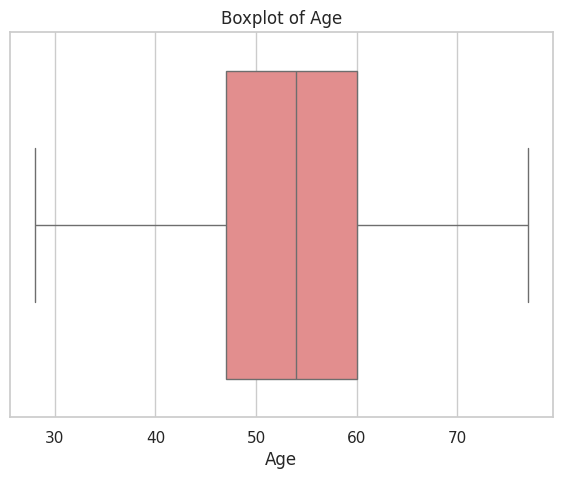

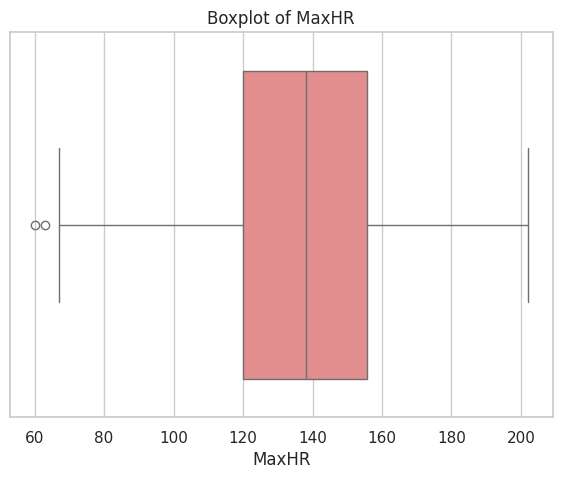

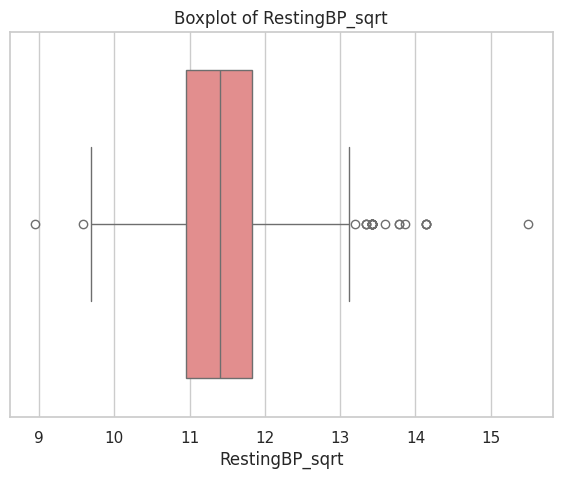

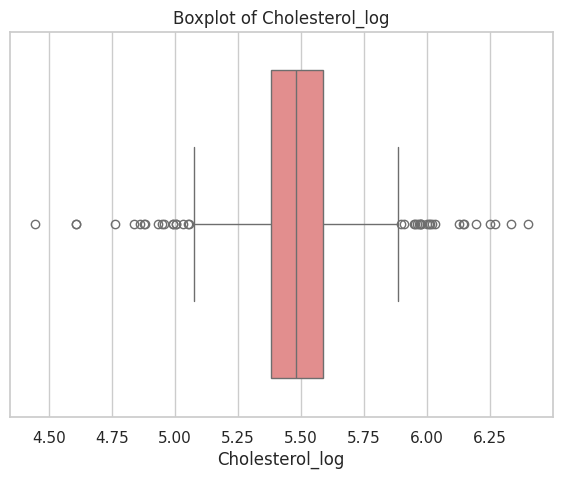

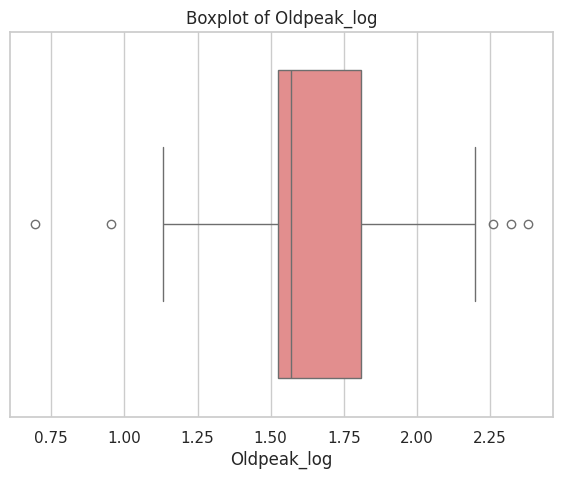

In [18]:
for col in numeric_cols:
  plt.figure()
  sns.boxplot(x=df[col], color='lightcoral')
  plt.title(f"Boxplot of {col}")
  plt.xlabel(col)
  plt.show()

<Axes: >

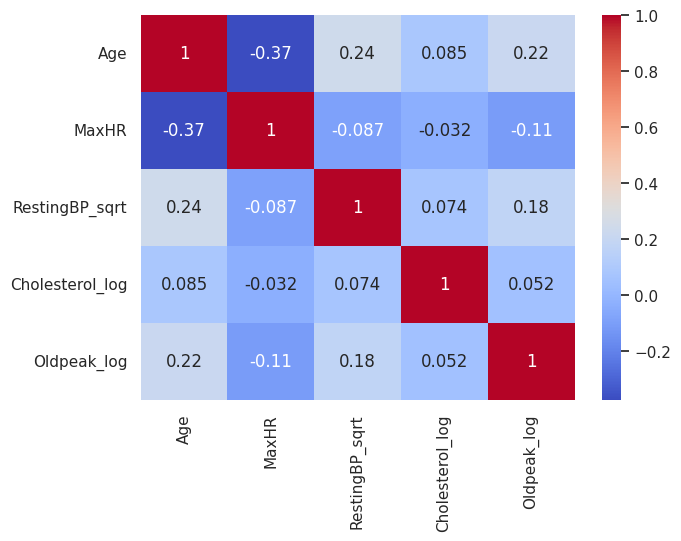

In [19]:
import seaborn as sns
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')

In [20]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier

# --- Separate features and target ---
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

# --- Identify categorical and numeric columns ---
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

# --- Encode categorical features ---
X_encoded = X.copy()
for col in categorical_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))

# --- Scale numeric features ---
scaler = StandardScaler()
X_encoded[numeric_cols] = scaler.fit_transform(X_encoded[numeric_cols])

# --- Encode the target (HeartDisease) ---
y = LabelEncoder().fit_transform(y.astype(str))

# --- Split data ---
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

# --- Train XGBoost model ---
model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

model.fit(X_train, y_train)

# --- Predictions ---
y_pred = model.predict(X_test)

# --- Evaluation ---
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:49:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Accuracy: 0.8043478260869565

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.77      0.78        82
           1       0.82      0.83      0.83       102

    accuracy                           0.80       184
   macro avg       0.80      0.80      0.80       184
weighted avg       0.80      0.80      0.80       184


🧮 Confusion Matrix:
 [[63 19]
 [17 85]]


In [22]:
import os
import joblib
import pandas as pd
from sdv.single_table import TVAESynthesizer
from sdv.metadata import SingleTableMetadata
import warnings
warnings.filterwarnings('ignore')

def generate_synthetic_data(df, n_samples, verbose=True):
    """Generate synthetic data using TVAE"""

    # Joblib compatibility patch
    os.environ["JOBLIB_MULTIPROCESSING"] = "0"
    os.environ["JOBLIB_N_JOBS"] = "1"

    _real_init = joblib.Parallel.__init__
    def _safe_init(self, *args, **kwargs):
        kwargs["n_jobs"] = 1
        return _real_init(self, *args, **kwargs)
    joblib.Parallel.__init__ = _safe_init

    # Auto-detect metadata
    metadata = SingleTableMetadata()
    metadata.detect_from_dataframe(df)

    # Create and train synthesizer
    synthesizer = TVAESynthesizer(
        metadata,
        epochs=400,
        batch_size=min(128, len(df)),
        embedding_dim=128,
        enforce_min_max_values=True,
        verbose=False
    )

    synthesizer.fit(df)
    synthetic_data = synthesizer.sample(n_samples)

    # Clean up data types
    for col in df.columns:
        if df[col].dtype in ['int64', 'int32', 'int16', 'int8']:
            synthetic_data[col] = synthetic_data[col].round().astype(df[col].dtype)

    return synthetic_data


In [23]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns


# --- Encode categorical features ---
df_encoded = df.copy()
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

In [24]:
synthetic_df = generate_synthetic_data(df = df_encoded, n_samples = 5000)

In [25]:
synthetic_df.head()

,Age,Sex,ChestPainType,FastingBS,RestingECG,MaxHR,ExerciseAngina,ST_Slope,HeartDisease,RestingBP_sqrt,Cholesterol_log,Oldpeak_log
0,46,1,0,0,1,128,1,1,1,12.592253,5.631765,1.688572
1,41,0,1,0,1,165,0,2,0,10.937537,5.605400,1.528109
2,33,1,2,0,1,173,0,2,0,10.840401,5.206893,1.531509
3,42,1,1,0,1,145,0,1,0,10.925172,5.214863,1.525147
4,49,1,2,0,1,148,0,2,0,10.832897,5.484414,1.681623


In [27]:
# --- Separate features and target ---
X = synthetic_df.drop(columns=['HeartDisease'])
y = synthetic_df['HeartDisease']

# --- Identify categorical and numeric columns ---
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

# --- Encode categorical features ---
X_encoded = X.copy()
for col in categorical_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))

# --- Scale numeric features ---
scaler = StandardScaler()
X_encoded[numeric_cols] = scaler.fit_transform(X_encoded[numeric_cols])

# --- Encode the target (HeartDisease) ---
y = LabelEncoder().fit_transform(y.astype(str))

# --- Split data ---
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

# --- Train XGBoost model ---
model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

model.fit(X_train, y_train)

# --- Predictions ---
y_pred = model.predict(X_test)

# --- Evaluation ---
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

✅ Accuracy: 0.904

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.86      0.89       439
           1       0.89      0.94      0.92       561

    accuracy                           0.90      1000
   macro avg       0.91      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000


🧮 Confusion Matrix:
 [[377  62]
 [ 34 527]]


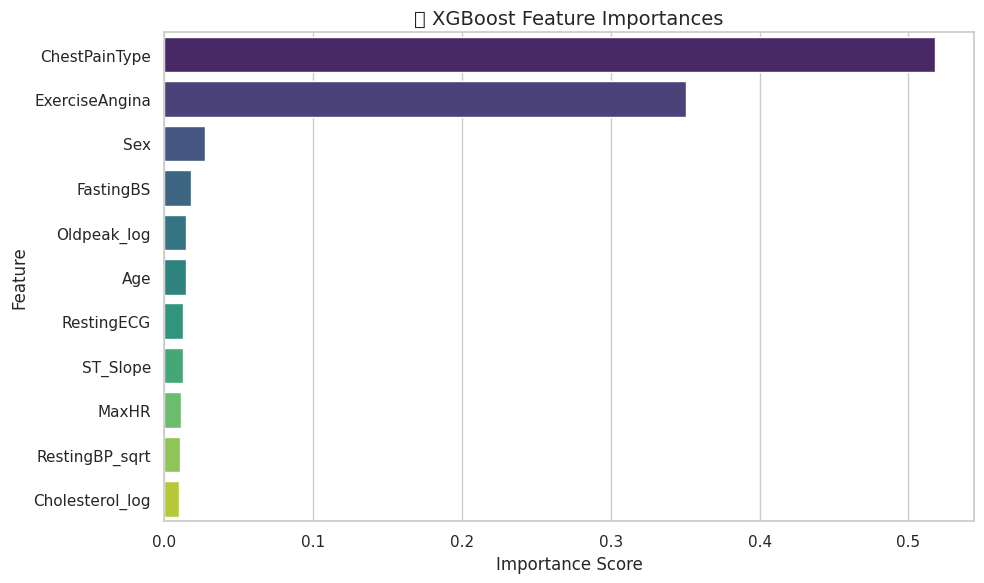

In [29]:
# --- Feature Importance Plot ---
importances = model.feature_importances_
feature_names = X_encoded.columns

# Create DataFrame for visualization
importance_df = (
    pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    .sort_values(by='Importance', ascending=False)
)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('🔥 XGBoost Feature Importances', fontsize=14)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()